In [ ]:
import os
import requests

import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import torch

from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco, ReportDecoUtilized
from lightautoml.addons.tabular_interpretation import SSWARM

from sklearn.preprocessing import LabelEncoder


/usr/local/lib/python3.11/dist-packages/lightautoml/transformers/text.py:22: UserWarning: 'gensim' - package isn't installed
  warnings.warn("'gensim' - package isn't installed")


In [ ]:
! pip install numpy==1.24.4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 39.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which 

In [ ]:
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 300

In [ ]:
df = pd.read_csv('./1234_added_cols.csv', sep=';')
drop_cols = ['isna', 'student_group','student_name', 'person_id', 'project_id', 'rate_total', 'project_head']
df = df.drop(columns = drop_cols)

cat_features = ['stepen', 'course']
df[cat_features] = df[cat_features].astype(str)
df= df.replace('nan', np.nan)
label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['target_multiclass'])


In [ ]:
train_data, test_data = train_test_split(
    df,
    test_size=TEST_SIZE,
    stratify=df['target_encoded'],
    random_state=RANDOM_STATE
)

print(f'Data is splitted. Parts sizes: train_data = {train_data.shape}, test_data = {test_data.shape}')

train_data.head()

Data is splitted. Parts sizes: train_data = (987, 51), test_data = (247, 51)


,year,department,type,target_multiclass,target,stepen,course,total_activity_zulip,reactions_added_zulip,messages_created_zulip,...,student_operation_contribution_git,avg_dt_between_commits_git,student_commits_contribution_git,messages_updated_zulip,reactions_removed_zulip,hours_last_month_user_taiga,hours_last_year_user_taiga,count_head_project,count_head_defenses,target_encoded
882,2022-2023,ДКИ,Прогр.,Отл,1,М,1.0,1565.0,427.0,1138.0,...,NaN,NaN,NaN,39.0,1.0,0.0,0.0,1.0,18.0,1
564,2022-2023,ДПМ,НИР,Хор,1,М,1.0,28.0,0.0,28.0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,3.0,3.0,3
1030,2022-2023,ВШЭ/МИЭМ,Прогр.,Отл,1,Б,3.0,40.0,11.0,29.0,...,1.000000,0.411955,1.000000,0.0,0.0,0.0,0.0,9.0,55.0,1
570,2021-2022,ДКИ,Прогр.,Отл,1,М,1.0,NaN,NaN,NaN,...,0.034677,0.216100,0.318841,NaN,NaN,NaN,NaN,NaN,NaN,1
870,2022-2023,ДКИ,Прогр-аппарат.,Хор,1,Б,2.0,15.0,5.0,10.0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,6.0,25.0,3


In [ ]:
task = Task('multiclass')

In [ ]:
roles = {
    'target': 'target_encoded',
    'drop': ['target', 'target_multiclass'],
    'category': cat_features
}

In [ ]:
automl = TabularAutoML(
    task = task,
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
)

In [ ]:
%%time
out_of_fold_predictions = automl.fit_predict(train_data, roles = roles, verbose = 1)

[11:22:00] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[11:22:00] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer


[11:22:00] Task: multiclass



INFO:lightautoml.automl.presets.base:Task: multiclass



[11:22:00] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[11:22:00] - time: 300.00 seconds


INFO:lightautoml.automl.presets.base:- time: 300.00 seconds


[11:22:00] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[11:22:00] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[11:22:00] Train data shape: (987, 51)



INFO:lightautoml.reader.base:Train data shape: (987, 51)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[11:22:11] Layer 1 train process start. Time left 289.33 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 289.33 secs


[11:22:11] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 73, 74], 'embed_sizes': array([10, 14, 26, 21,  9,  7, 15, 22, 10, 33, 10,  2,  2, 46, 10, 52, 12,
       10, 25,  5,  7,  6, 23, 10, 10,  2,  6, 12,  3, 11, 11],
      dtype=int32), 'data_size': 122}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 sco

[11:22:26] Time limit exceeded after calculating fold 1



INFO:lightautoml.ml_algo.base:Time limit exceeded after calculating fold 1



[11:22:26] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -0.9663395630789334


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -0.9663395630789334


[11:22:26] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[11:22:26] Time left 273.79 secs



INFO:lightautoml.automl.base:Time left 273.79 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's multi_logloss: 1.0316
INFO3:lightautoml.ml_algo.boost_lgbm:[200]	valid's multi_logloss: 1.0045
INFO3:lightautoml.ml_algo.boost_lgbm:[300]	valid's multi_logloss: 0.990237
INFO3:lightautoml.ml_algo.boost_lgbm:[400]	valid's multi_logloss: 0.983055
INFO3:lightautoml.ml_algo.boost_lgbm:[500]	valid's multi_logloss: 0.981303
INFO3:lightautoml.ml_algo.boost_lgbm:[600]	valid's multi_logloss: 0.981859
INFO3:lightautoml.ml_algo.boost_lgbm:[700]	valid's multi_logloss: 0.984722
INFO3:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[549]	valid's multi_logloss: 0.980803


[11:22:31] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[11:22:31] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42, 'verbose_eval': 100}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's multi_logloss: 1.02753
INFO3:lightautoml.ml_algo.boost_lgbm:[200]	valid's multi_logloss: 1.00017
INFO3:lightautoml.ml_algo.boost_lgbm:[300]	valid's multi_logloss: 0.985799
INFO3:lightautoml.ml_algo.boost_lgbm:[400]	valid's multi_logl

[11:22:45] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -0.9714859903713554


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -0.9714859903713554


[11:22:45] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[11:22:45] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 1.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 1.00 secs
Optimization Progress:   0%|          | 0/101 [00:00<?, ?it/s]INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-f212b9ba-f872-43df-a87e-04283887c39a
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's multi_logloss: 1.01188
INFO3:lightautoml.ml_algo.boost_lgbm:[200]	valid's multi_logloss: 0.985382
INFO3:lightautoml.ml_algo.boost_lgbm:[300]	valid's multi_logloss: 0.981894
INFO3:lightautoml.ml_algo.boost_lgbm:[400]	valid's multi_logloss: 0.983662
INFO3:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[260]	valid's multi_logloss: 0.981416
INFO:optuna.study.study:Trial 0 finished with value: -0.9814160924512993 and parameters: {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.

[11:22:47] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed



INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}
 achieve -0.9814 crossentropy


[11:22:47] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 244, 'feature_fraction': 0.6872700594236812, 'bagging_fraction': 0.8659969709057025, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'verbose_eval': 100, 'min_sum_hessian_in_leaf': 0.24810409748678125}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's multi_logloss: 1.00948
INFO3:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[53]	va

[11:22:50] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -0.9712786048620251


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -0.9712786048620251


[11:22:50] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[11:22:50] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False, 'verbose_eval': 100}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 1.3675597	test: 1.3709499	best: 1.3709499 (0)	total: 53.2ms	remaining: 2m 39s
INFO3:lightautoml.ml_algo.boost_cb:100:	learn: 0.9394184	test: 1.0316879	best: 1.0316879 (100)	total: 367ms	remaining: 10.5s
INFO3:lightautoml.ml_

[11:23:01] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -0.9672291297009636


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -0.9672291297009636


[11:23:01] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[11:23:01] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 94.45 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 94.45 secs
Optimization Progress:   0%|          | 0/101 [00:00<?, ?it/s]INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-ee2b8be9-3d0a-4d33-86e0-df026dbbcce5
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 1.3675543	test: 1.3693528	best: 1.3693528 (0)	total: 2.35ms	remaining: 7.05s
INFO3:lightautoml.ml_algo.boost_cb:100:	learn: 0.9730458	test: 1.0646931	best: 1.0646931 (100)	total: 206ms	remaining: 5.92s
INFO3:lightautoml.ml_algo.boost_cb:200:	learn: 0.8708394	test: 1.0346371	best: 1.0346062 (198)	total: 418ms	remaining: 5.82s
INFO3:lightautoml.ml_algo.boost_cb:300:	learn: 0.7632236	test: 0.9991368	best: 0.9991368 (300)	total: 633ms	remaining: 5.67s
INFO3:lightautoml.ml_algo.boost_cb:400:	learn: 0.6663665	test: 0.9708108	best: 0.9708108 (400)	total: 951ms	remaining: 6.16s
INFO3:lightautoml.ml_algo.boost_cb:500:	learn: 0.5882567

[11:24:39] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed



INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 0.6792149687518751, 'min_data_in_leaf': 12}
 achieve -0.9091 crossentropy


[11:24:39] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.6792149687518751, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 4, 'min_data_in_leaf': 12, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Max', 'verbose': 100, 'allow_writing_files': False, 'verbose_eval': 100}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 1.3688863	test: 1.3705205	best: 1.3705205 (0)	total: 10.4ms	remaining: 31.3s
INFO3:lightautoml.ml_algo.boost_cb:100:	learn: 0.9937139	test: 1.0669458	best: 1.0669458 (100)	total: 695ms	remaining: 1

[11:24:50] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -0.9675422993991823


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -0.9675422993991823


[11:24:50] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[11:24:50] Time left 129.96 secs



INFO:lightautoml.automl.base:Time left 129.96 secs



[11:24:50] Time limit exceeded in one of the tasks. AutoML will blend level 1 models.



INFO:lightautoml.automl.base:Time limit exceeded in one of the tasks. AutoML will blend level 1 models.



[11:24:50] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[11:24:50] Blending: optimization starts with equal weights. Score = -0.9488295


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights. Score = -0.9488295


[11:24:50] Blending: iteration 0: score = -0.9459139, weights = [0.3942829  0.         0.16999784 0.19752306 0.23819622]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = -0.9459139, weights = [0.3942829  0.         0.16999784 0.19752306 0.23819622]


[11:24:50] Blending: iteration 1: score = -0.9458674, weights = [0.36122295 0.         0.18279164 0.21700388 0.23898156]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = -0.9458674, weights = [0.36122295 0.         0.18279164 0.21700388 0.23898156]


[11:24:50] Blending: iteration 2: score = -0.9458665, weights = [0.36576042 0.         0.18071622 0.2146394  0.23888397]


INFO:lightautoml.automl.blend:Blending: iteration 2: score = -0.9458665, weights = [0.36576042 0.         0.18071622 0.2146394  0.23888397]


[11:24:50] Blending: no improvements for score. Terminated.



INFO:lightautoml.automl.blend:Blending: no improvements for score. Terminated.



[11:24:50] Blending: best score = -0.9458665, best weights = [0.36576042 0.         0.18071622 0.2146394  0.23888397]


INFO:lightautoml.automl.blend:Blending: best score = -0.9458665, best weights = [0.36576042 0.         0.18071622 0.2146394  0.23888397]


[11:24:50] Automl preset training completed in 170.41 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 170.41 seconds



[11:24:50] Model description:
Final prediction for new objects (level 0) = 
	 0.36576 * (2 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.18072 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.21464 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.23888 * (5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.36576 * (2 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.18072 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.21464 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.23888 * (5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



CPU times: user 3min 44s, sys: 18.5 s, total: 4min 3s
Wall time: 2min 50s


In [ ]:
%%time

test_predictions = automl.predict(test_data)
print(f'Prediction for test_data:\n{test_predictions}\nShape = {test_predictions.shape}')

Prediction for test_data:
array([[0.07904062, 0.5222739 , 0.0463769 , 0.3523085 ],
       [0.1372817 , 0.45710236, 0.06273308, 0.34288287],
       [0.00330947, 0.8538841 , 0.00268931, 0.14011715],
       [0.16228496, 0.281007  , 0.21345656, 0.3432515 ],
       [0.10685567, 0.7483994 , 0.02774016, 0.11700478],
       [0.02547894, 0.3118403 , 0.01724309, 0.64543766],
       [0.01252281, 0.40673918, 0.00860092, 0.5721371 ],
       [0.07626615, 0.44245985, 0.08780454, 0.39346948],
       [0.07028724, 0.5304544 , 0.03466463, 0.36459368],
       [0.0101255 , 0.6525028 , 0.01639446, 0.32097727],
       [0.05456382, 0.4083703 , 0.11472931, 0.42233658],
       [0.0516318 , 0.25536895, 0.02366219, 0.6693371 ],
       [0.01452428, 0.8224722 , 0.01999476, 0.14300874],
       [0.05206922, 0.48978937, 0.07688824, 0.38125315],
       [0.12087864, 0.38759902, 0.06792577, 0.42359662],
       [0.03136163, 0.46639234, 0.11288174, 0.3893643 ],
       [0.01486846, 0.4850817 , 0.01829511, 0.48175472],
     

In [ ]:
from sklearn.metrics import roc_auc_score
TARGET_NAME = 'target_encoded'

# OOF
print(f'OOF ROC-AUC: {roc_auc_score(train_data[TARGET_NAME].values, out_of_fold_predictions.data, multi_class="ovr")}')

# HOLDOUT
print(f'HOLDOUT ROC-AUC: {roc_auc_score(test_data[TARGET_NAME].values, test_predictions.data, multi_class="ovr")}')


OOF ROC-AUC: 0.7638693271446968
HOLDOUT ROC-AUC: 0.7258908764502324


In [ ]:
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 0.36576 * (2 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.18072 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.21464 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.23888 * (5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Получаем предсказанные метки — берем argmax по вероятностям
train_preds = np.argmax(out_of_fold_predictions.data, axis=1)
test_preds = np.argmax(test_predictions.data, axis=1)

print('TRAIN')
print(classification_report(train_data[TARGET_NAME].values, train_preds))

print('TEST')
print(classification_report(test_data[TARGET_NAME].values, test_preds))


TRAIN
              precision    recall  f1-score   support

           0       0.38      0.07      0.12        80
           1       0.64      0.80      0.71       475
           2       0.53      0.12      0.20        74
           3       0.57      0.58      0.57       358

    accuracy                           0.61       987
   macro avg       0.53      0.39      0.40       987
weighted avg       0.58      0.61      0.57       987

TEST
              precision    recall  f1-score   support

           0       0.33      0.05      0.09        20
           1       0.55      0.72      0.63       119
           2       1.00      0.11      0.20        18
           3       0.53      0.51      0.52        90

    accuracy                           0.55       247
   macro avg       0.60      0.35      0.36       247
weighted avg       0.56      0.55      0.51       247



In [ ]:
a = []
report = classification_report(train_data[TARGET_NAME].values, train_preds, output_dict=True)
report_test = classification_report(test_data[TARGET_NAME].values, test_preds, output_dict=True)

res = pd.DataFrame(report).transpose().add_suffix('_train').merge(pd.DataFrame(report_test).transpose().add_suffix('_test'), left_index=True, right_index=True).rename('{}_automl'.format)
a.append(res)


In [ ]:
pd.concat(a).round(2)

,precision_train,recall_train,f1-score_train,support_train,precision_test,recall_test,f1-score_test,support_test
0_automl,0.38,0.08,0.12,80.00,0.33,0.05,0.09,20.00
1_automl,0.64,0.80,0.71,475.00,0.55,0.72,0.63,119.00
2_automl,0.53,0.12,0.20,74.00,1.00,0.11,0.20,18.00
3_automl,0.57,0.58,0.57,358.00,0.53,0.51,0.52,90.00
accuracy_automl,0.61,0.61,0.61,0.61,0.55,0.55,0.55,0.55
macro avg_automl,0.53,0.39,0.40,987.00,0.60,0.35,0.36,247.00
weighted avg_automl,0.58,0.61,0.57,987.00,0.56,0.55,0.51,247.00


# REPORT

In [ ]:
RD = ReportDeco(output_path = 'tabularAutoML_model_report')

automl_rd = RD(
    TabularAutoML(
        task = task,
        timeout = TIMEOUT,
        cpu_limit = N_THREADS,
        reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
    )
)

In [ ]:
%%time
out_of_fold_predictions = automl_rd.fit_predict(train_data, roles = roles, verbose = 1)

[11:34:23] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[11:34:23] Task: multiclass



INFO:lightautoml.automl.presets.base:Task: multiclass



[11:34:23] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[11:34:23] - time: 300.00 seconds


INFO:lightautoml.automl.presets.base:- time: 300.00 seconds


[11:34:23] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[11:34:23] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[11:34:23] Train data shape: (987, 51)



INFO:lightautoml.reader.base:Train data shape: (987, 51)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[11:34:41] Layer 1 train process start. Time left 282.07 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 282.07 secs
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


[11:34:42] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 73, 74], 'embed_sizes': array([10, 14, 26, 21,  9,  7, 15, 22, 10, 33, 10,  2,  2, 46, 10, 52, 12,
       10, 25,  5,  7,  6, 23, 10, 10,  2,  6, 12,  3, 11, 11],
      dtype=int32), 'data_size': 122}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -1.117801775583574
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -1.11359557125982
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear mo

[11:34:54] Time limit exceeded after calculating fold 2



INFO:lightautoml.ml_algo.base:Time limit exceeded after calculating fold 2



[11:34:54] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -0.9829026675650236


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -0.9829026675650236


[11:34:54] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[11:34:54] Time left 269.40 secs



INFO:lightautoml.automl.base:Time left 269.40 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's multi_logloss: 1.0316
INFO3:lightautoml.ml_algo.boost_lgbm:[200]	valid's multi_logloss: 1.0045
INFO3:lightautoml.ml_algo.boost_lgbm:[300]	valid's multi_logloss: 0.990237
INFO3:lightautoml.ml_algo.boost_lgbm:[400]	valid's multi_logloss: 0.983055
INFO3:lightautoml.ml_algo.boost_lgbm:[500]	valid's multi_logloss: 0.981303
INFO3:lightautoml.ml_algo.boost_lgbm:[600]	valid's multi_logloss: 0.981859
INFO3:lightautoml.ml_algo.boost_lgbm:[700]	valid's multi_logloss: 0.984722
INFO3:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[549]	valid's multi_logloss: 0.980803


[11:34:58] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[11:34:58] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42, 'verbose_eval': 100}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's multi_logloss: 1.02753
INFO3:lightautoml.ml_algo.boost_lgbm:[200]	valid's multi_logloss: 1.00017
INFO3:lightautoml.ml_algo.boost_lgbm:[300]	valid's multi_logloss: 0.985799
INFO3:lightautoml.ml_algo.boost_lgbm:[400]	valid's multi_logl

[11:35:16] Time limit exceeded after calculating fold 1



INFO:lightautoml.ml_algo.base:Time limit exceeded after calculating fold 1



[11:35:16] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -0.9602304632605827


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -0.9602304632605827


[11:35:16] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[11:35:16] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 1.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 1.00 secs
Optimization Progress:   0%|          | 0/101 [00:00<?, ?it/s]INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-ddbf0462-546a-4e0a-bf52-2ed1b38921f9
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's multi_logloss: 1.01188
INFO3:lightautoml.ml_algo.boost_lgbm:[200]	valid's multi_logloss: 0.985382
INFO3:lightautoml.ml_algo.boost_lgbm:[300]	valid's multi_logloss: 0.981894
INFO3:lightautoml.ml_algo.boost_lgbm:[400]	valid's multi_logloss: 0.983662
INFO3:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[260]	valid's multi_logloss: 0.981416
INFO:optuna.study.study:Trial 0 finished with value: -0.9814160924512993 and parameters: {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.

[11:35:18] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed



INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}
 achieve -0.9814 crossentropy


[11:35:18] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 244, 'feature_fraction': 0.6872700594236812, 'bagging_fraction': 0.8659969709057025, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'verbose_eval': 100, 'min_sum_hessian_in_leaf': 0.24810409748678125}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's multi_logloss: 1.00948
INFO3:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[53]	va

[11:35:22] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -0.9712786048620251


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -0.9712786048620251


[11:35:22] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[11:35:22] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False, 'verbose_eval': 100}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 1.3675597	test: 1.3709499	best: 1.3709499 (0)	total: 4.69ms	remaining: 14.1s
INFO3:lightautoml.ml_algo.boost_cb:100:	learn: 0.9394184	test: 1.0316879	best: 1.0316879 (100)	total: 327ms	remaining: 9.37s
INFO3:lightautoml.ml_a

[11:35:34] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -0.9672291297009636


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -0.9672291297009636


[11:35:34] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[11:35:34] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 94.68 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 94.68 secs
Optimization Progress:   0%|          | 0/101 [00:00<?, ?it/s]INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-44f0abf7-7a83-4180-af0d-1e8ecc37516f
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 1.3675543	test: 1.3693528	best: 1.3693528 (0)	total: 2.3ms	remaining: 6.89s
INFO3:lightautoml.ml_algo.boost_cb:100:	learn: 0.9730458	test: 1.0646931	best: 1.0646931 (100)	total: 216ms	remaining: 6.2s
INFO3:lightautoml.ml_algo.boost_cb:200:	learn: 0.8708394	test: 1.0346371	best: 1.0346062 (198)	total: 427ms	remaining: 5.94s
INFO3:lightautoml.ml_algo.boost_cb:300:	learn: 0.7632236	test: 0.9991368	best: 0.9991368 (300)	total: 634ms	remaining: 5.69s
INFO3:lightautoml.ml_algo.boost_cb:400:	learn: 0.6663665	test: 0.9708108	best: 0.9708108 (400)	total: 868ms	remaining: 5.63s
INFO3:lightautoml.ml_algo.boost_cb:500:	learn: 0.5882567	t

[11:37:08] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed



INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 0.6792149687518751, 'min_data_in_leaf': 12}
 achieve -0.9091 crossentropy


[11:37:08] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.6792149687518751, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 4, 'min_data_in_leaf': 12, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Max', 'verbose': 100, 'allow_writing_files': False, 'verbose_eval': 100}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 1.3688863	test: 1.3705205	best: 1.3705205 (0)	total: 3.67ms	remaining: 11s
INFO3:lightautoml.ml_algo.boost_cb:100:	learn: 0.9937139	test: 1.0669458	best: 1.0669458 (100)	total: 211ms	remaining: 6.0

[11:37:20] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -0.9675422993991823


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -0.9675422993991823


[11:37:20] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[11:37:20] Time left 123.10 secs



INFO:lightautoml.automl.base:Time left 123.10 secs



[11:37:20] Time limit exceeded in one of the tasks. AutoML will blend level 1 models.



INFO:lightautoml.automl.base:Time limit exceeded in one of the tasks. AutoML will blend level 1 models.



[11:37:20] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[11:37:20] Blending: optimization starts with equal weights. Score = -0.9461544


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights. Score = -0.9461544


[11:37:20] Blending: iteration 0: score = -0.9433955, weights = [0.36485878 0.         0.1928369  0.21724351 0.22506084]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = -0.9433955, weights = [0.36485878 0.         0.1928369  0.21724351 0.22506084]


[11:37:21] Blending: iteration 1: score = -0.9433918, weights = [0.35788822 0.         0.1937877  0.22406752 0.22425659]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = -0.9433918, weights = [0.35788822 0.         0.1937877  0.22406752 0.22425659]


[11:37:21] Blending: no improvements for score. Terminated.



INFO:lightautoml.automl.blend:Blending: no improvements for score. Terminated.



[11:37:21] Blending: best score = -0.9433918, best weights = [0.35788822 0.         0.1937877  0.22406752 0.22425659]


INFO:lightautoml.automl.blend:Blending: best score = -0.9433918, best weights = [0.35788822 0.         0.1937877  0.22406752 0.22425659]


[11:37:21] Automl preset training completed in 177.16 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 177.16 seconds



[11:37:21] Model description:
Final prediction for new objects (level 0) = 
	 0.35789 * (3 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.19379 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.22407 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.22426 * (5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.35789 * (3 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.19379 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.22407 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.22426 * (5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



CPU times: user 4min, sys: 16.9 s, total: 4min 17s
Wall time: 2min 58s


CPU times: user 179 ms, sys: 60.9 ms, total: 240 ms
Wall time: 176 ms


<Axes: xlabel='Feature'>

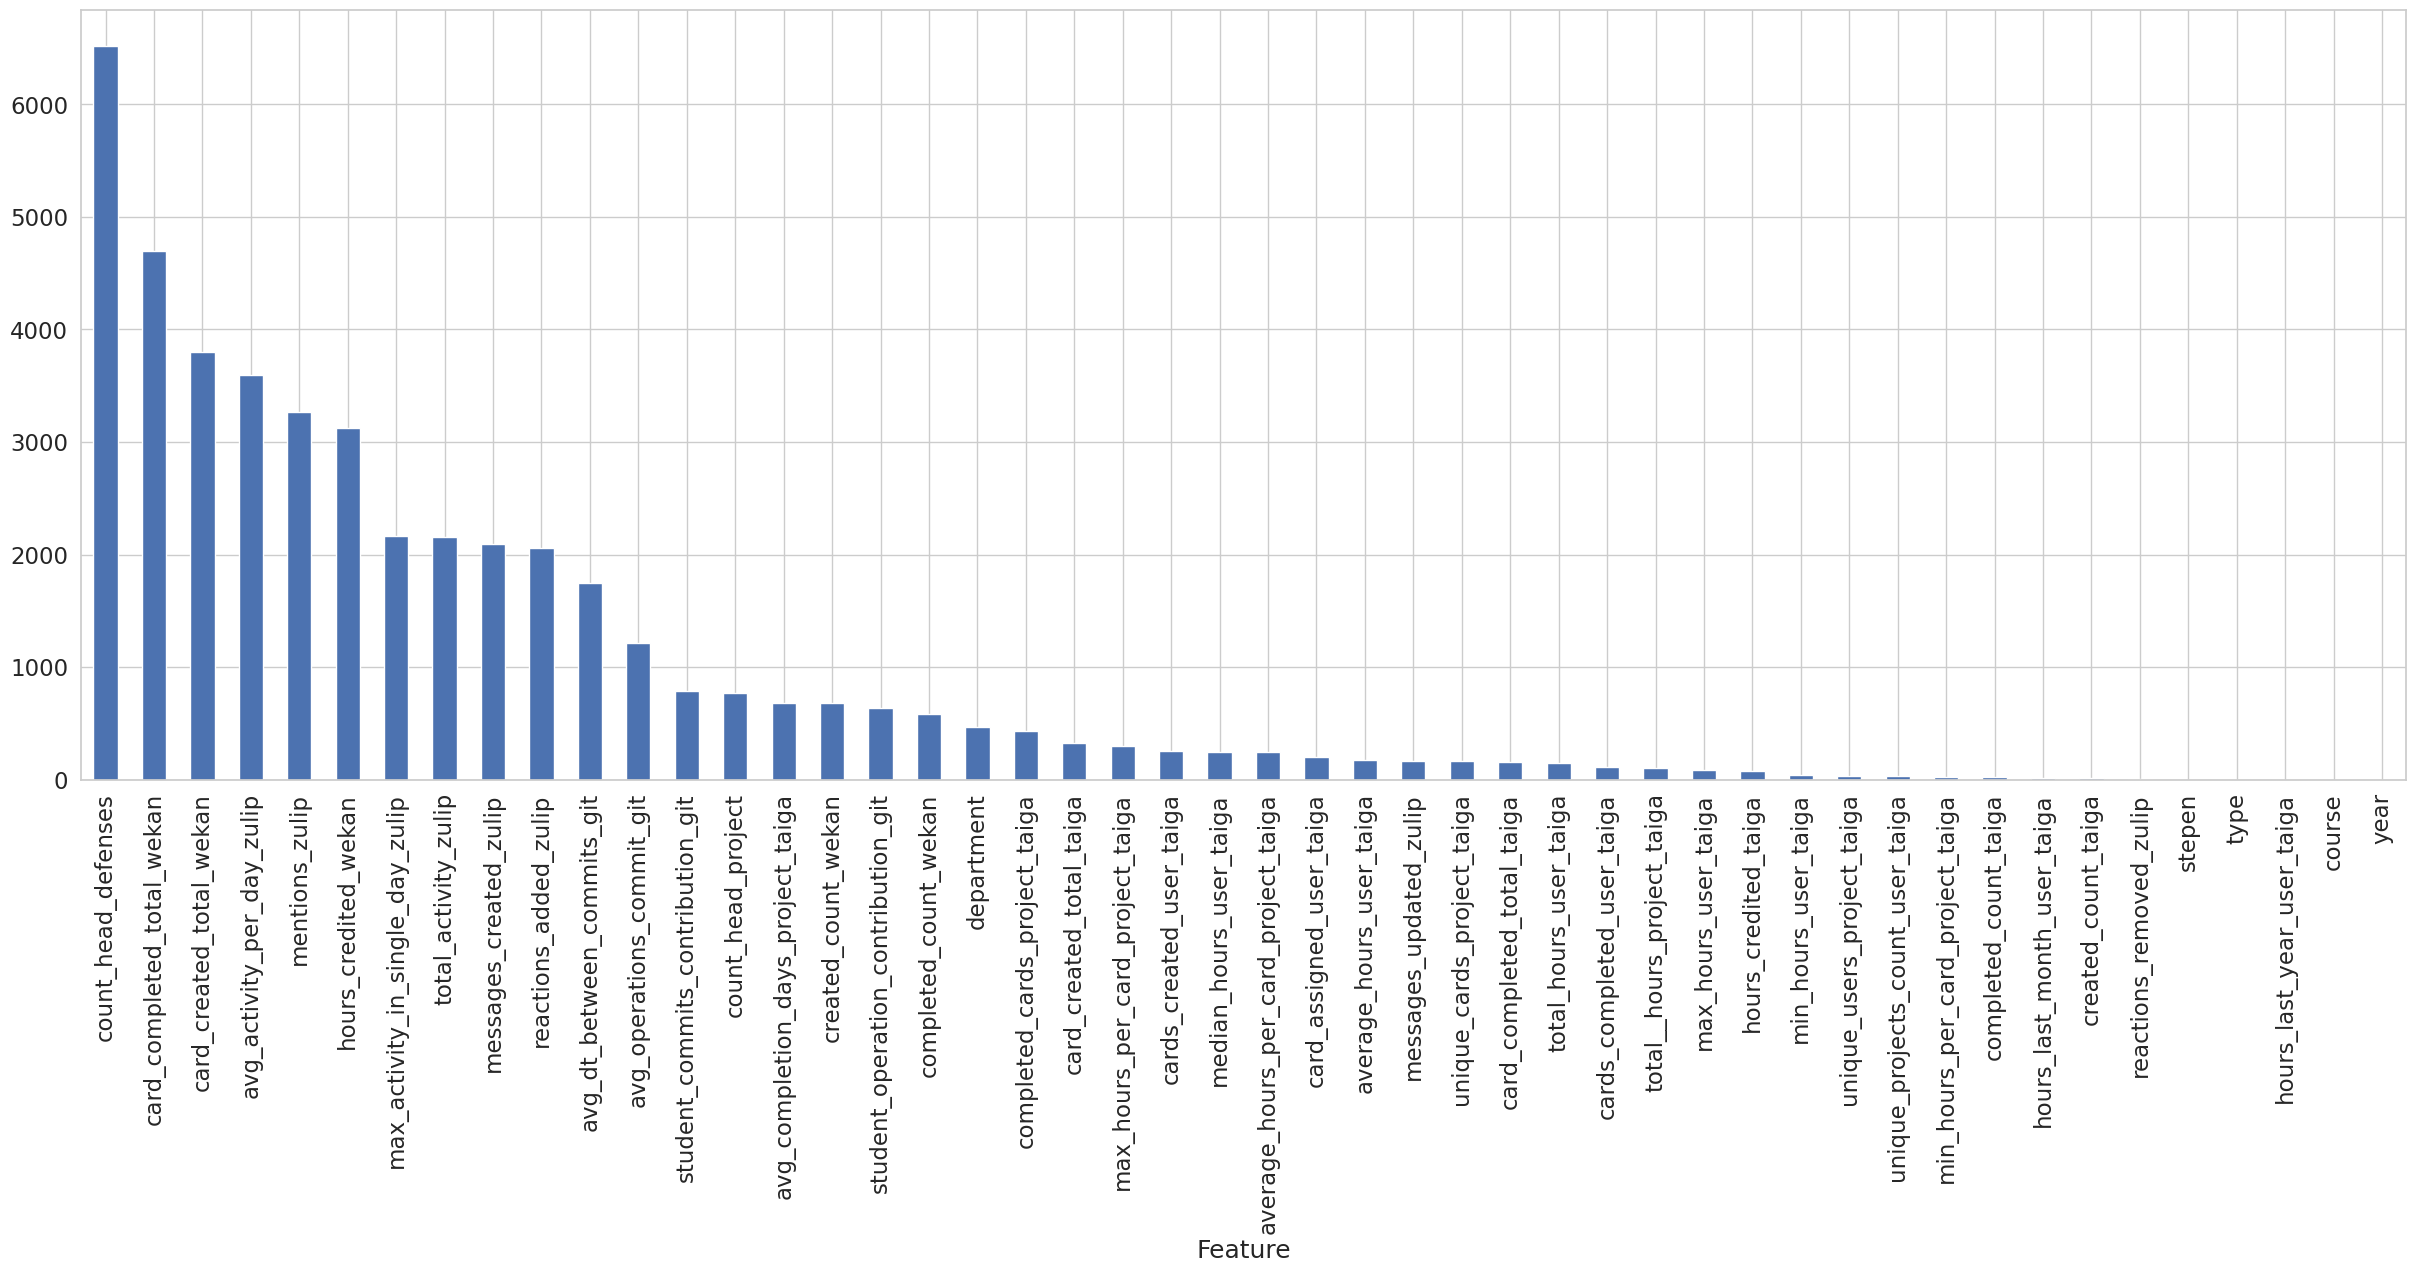

In [ ]:
%%time

# Fast feature importances calculation
fast_fi = automl_rd.model.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

100%|██████████| 3000/3000 [01:47<00:00, 27.91it/s]


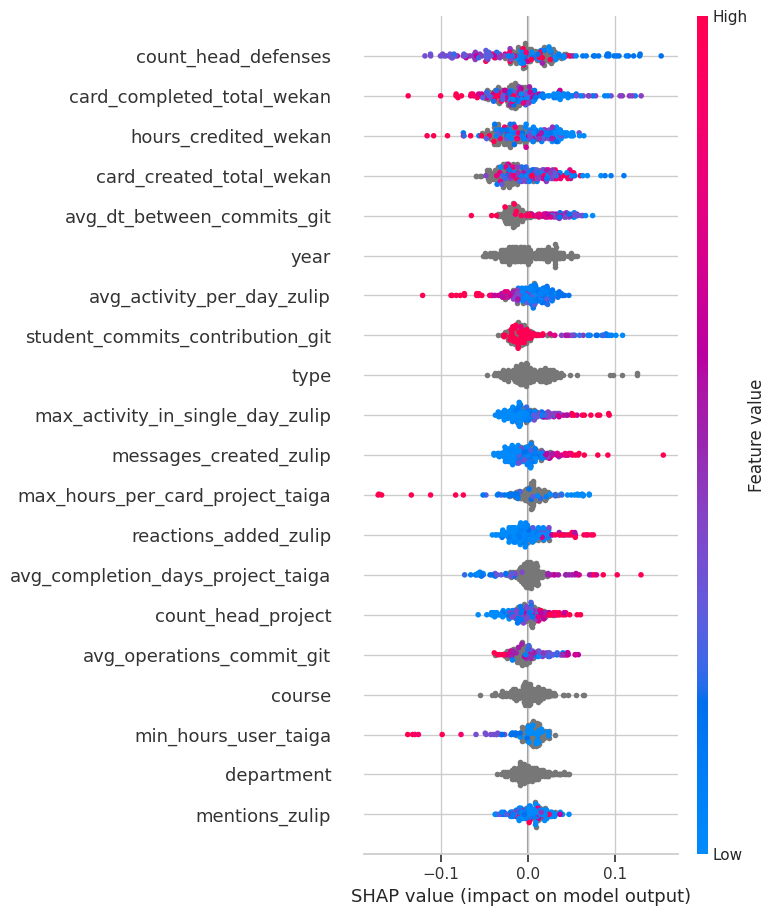

In [ ]:
explainer = SSWARM(automl_rd.model)
shap_values = explainer.shap_values(test_data, n_jobs=N_THREADS)

import shap
shap.summary_plot(shap_values[1], test_data[explainer.used_feats])